In [6]:
# Important standard packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
data=pd.read_csv("FAOLEX_All.csv")
# print(data.keys())
# print(df.info())
# print(keywords[:5])

# Create simplified version of the dataframe by discarding irrelevant columns 
to_drop = ['Record Id', 
           'Record URL', 
           'Document URL', 
           'Title',
           'Original title',
           'Available website',
           'Abstract']

data.drop(to_drop, inplace=True, axis=1)

In [4]:
# Remove NaN values in the Countries/Territory and Keywords attributes 
data_no_nan = data.dropna(subset=["Country/Territory", "Keywords"])
# Remove all documents that have been repealed (Repealed == Y)
data_no_repealed = data_no_nan[data_no_nan.Repealed != 'Y']

data_kw = data_no_repealed[["Country/Territory","Keywords"]]
data_kw['index'] = data_kw.index
keywords = data_kw


/var/folders/sb/klhtpy1n7jd649__g8r7xj300000gn/T/ipykernel_9463/3815497852.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kw['index'] = data_kw.index


In [9]:
# Create a list of countries 
all_countries = keywords["Country/Territory"].tolist()

#
countries_new=[]
for coun in all_countries:
    if len(coun.split(";"))>=2:
        for c in coun.split("; "):
            countries_new.append(c)
    else:
        countries_new.append(coun)


In [11]:
len(countries_new)

179019

In [18]:
from collections import Counter
countries_counts = Counter(countries_new)

# for country, count in countries_counts.items():
len(countries_counts)


257

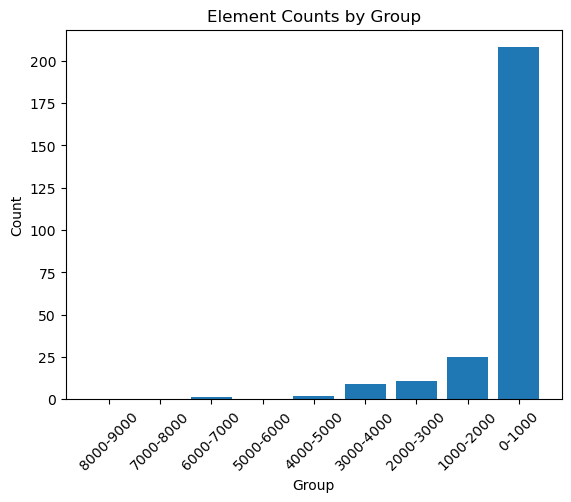

In [21]:
# Define the group ranges
group_ranges = [
    (8000, 9000),
    (7000, 8000),
    (6000, 7000),
    (5000, 6000),
    (4000, 5000),
    (3000, 4000),
    (2000, 3000),
    (1000, 2000),
    (0, 1000)
]

# Initialize group counts
group_counts = [0] * len(group_ranges)

# Categorize elements into groups based on their frequency
for element, count in countries_counts.items():
    for i, (lower, upper) in enumerate(group_ranges):
        if lower <= count <= upper:
            group_counts[i] += 1
            break

# Create a bar chart of the groups
group_labels = [f"{lower}-{upper}" for lower, upper in group_ranges]
x_pos = range(len(group_labels))

plt.bar(x_pos, group_counts)
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Element Counts by Group')
plt.xticks(x_pos, group_labels, rotation=45)
plt.show()


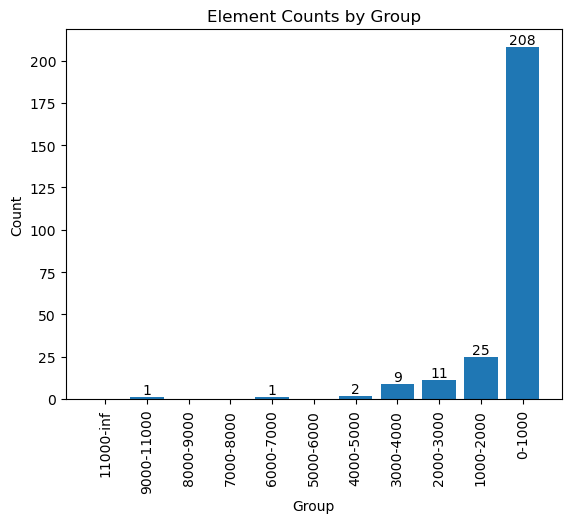

In [25]:
# Your list of elements
my_list = countries_new.copy()  # Replace [...] with your actual list

# Use Counter to count the occurrences of each element
element_counts = Counter(my_list)

# Define the group ranges
group_ranges = [
    (11000, float('inf')),
    (9000, 11000),
    (8000, 9000),
    (7000, 8000),
    (6000, 7000),
    (5000, 6000),
    (4000, 5000),
    (3000, 4000),
    (2000, 3000),
    (1000, 2000),
    (900, 1000),
    (800, 900),
    (700, 800),
    (900, 1000),
    (900, 1000),
]

# Initialize group counts and value labels
group_counts = [0] * len(group_ranges)
value_labels = [''] * len(group_ranges)

# Categorize elements into groups based on their frequency
for element, count in element_counts.items():
    for i, (lower, upper) in enumerate(group_ranges):
        if lower <= count <= upper:
            group_counts[i] += 1
            break

# Create a bar chart of the groups
group_labels = [f"{lower}-{upper}" for lower, upper in group_ranges]
x_pos = range(len(group_labels))

plt.bar(x_pos, group_counts)
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Element Counts by Group')
plt.xticks(x_pos, group_labels, rotation=90)

# Add value labels to the bars
for i, count in enumerate(group_counts):
    if count > 0:
        value_labels[i] = str(count)

for i, (x, y) in enumerate(zip(x_pos, group_counts)):
    plt.text(x, y, value_labels[i], ha='center', va='bottom')

plt.show()


In [32]:
len(my_list)

179019